In [1]:
using Revise
#addprocs(4)
using Walk1DMDP, CMDPs
using POMDPs, POMDPToolbox, MCTS
using DataFrames
using Plots; gr()

Plots.GRBackend()

In [2]:
mdp = Walk1D()
b = CBTSDPWBandit(mdp; exploration_constant=5.0, k_action=1.0, alpha_action=0.5, fit_qs=true)
solver = ModularSolver(mdp, b; n_iterations=200)
policy = solve(solver, mdp);

In [3]:
s0 = initial_state(mdp, Base.GLOBAL_RNG)

Walk1DMDP.Walk1DState(0, 1.0)

In [4]:
hr = HistoryRecorder(; rng=Base.GLOBAL_RNG)
h = simulate(hr, mdp, policy, s0);

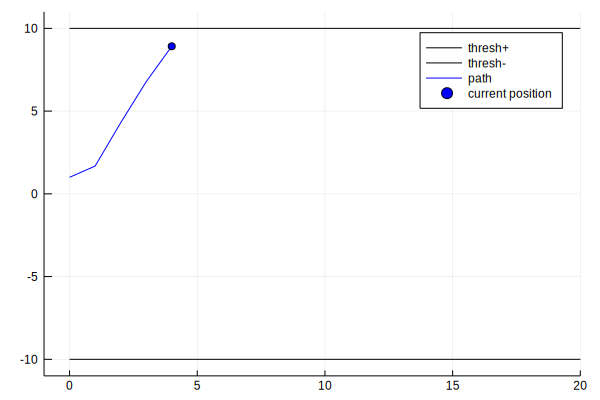

In [5]:
plot(mdp, h)

In [6]:
sum(h.reward_hist)

-14.345881052850089

## Observer

In [20]:
mdp = Walk1D()
observer = AQObserver(1)
b = CBTSDPWBandit(mdp; exploration_constant=5.0, k_action=1.0, alpha_action=0.5, fit_qs=true, n_proposes=1000, observer=observer)
solver = ModularSolver(mdp, b; n_iterations=1200)
policy = solve(solver, mdp);

In [21]:
s0 = initial_state(mdp, Base.GLOBAL_RNG)
a, info = action_info(policy, s0)

(-0.2460191107114074, Dict{Symbol,Any}(Pair{Symbol,Any}(:tree_queries, 1200),Pair{Symbol,Any}(:search_time_us, 0x0000000000207cf6),Pair{Symbol,Any}(:best_path, MCTS.BestPathTracker(Any[], Any[], 0.0, Any[], Any[], 0.0, 1.0, 1.0))))

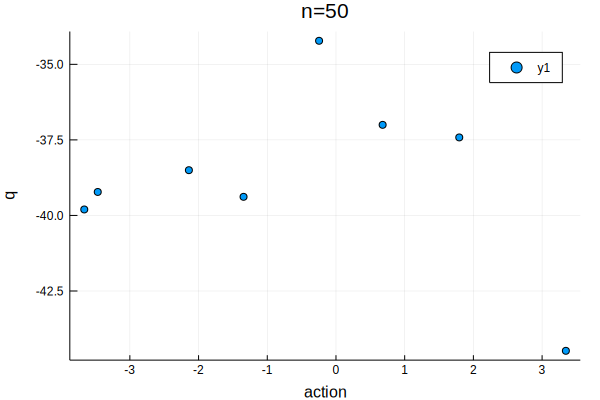

In [22]:
plot(observer, 50)

In [23]:
animate(observer; fps=4, ylim=(-45.0,-12.0))

INFO: Saved animation to /Users/rlee18/.julia/v0.6/CMDPs/notebooks/aqobserver.gif


Plots.AnimatedGif("/Users/rlee18/.julia/v0.6/CMDPs/notebooks/aqobserver.gif")

In [24]:
observer.Xs[10]

4-element Array{Float64,1}:
  0.679107
 -3.46737 
  3.3461  
 -1.34519 

In [25]:
observer.ys[500]

23-element Array{Float64,1}:
 -37.0023
 -39.2231
 -44.4794
 -39.3841
 -37.4187
 -23.6459
 -38.5024
 -42.5306
 -36.7053
 -36.2655
 -41.4367
 -37.3234
 -36.418 
 -37.1876
 -33.7903
 -36.9338
 -41.4583
 -41.1743
 -38.9628
 -31.0538
 -40.9848
 -35.1852
 -36.7533